# <a>  Data exploration and analysis  </a>

<h3> About the data </h3>

This dataset has been generated by the tool called Google Analytics, which is used to track website traffic. There are 11 fields in the dataset. Each of these fields give us an idea about how the user is interacting with a website, from where they belong and the device with which they are interacting the website. 

I have tried to understand the nature of the given data and unearth probable trends, in the process.

### <a id='main'><h3>Table of Contents</h3></a>

- [Importing the essential libraries](#lib)


- [1. Is there a relationship between the numerical metrics of Google analytics? Do they share any relationship with the kind of device used to access the webpage?](#1)

    - [1.1. What is the nature of the relationship shared by them? Are there other relationships too?](#1.1)

- [2. Does channel grouping share any relationship with the Google analytics metrics? If so what is their nature?](#2)
    
    - [2.1. Determine the countries where most users from the above specified channel traffics belong.](#2.1)
    
    - [2.2. Find out the cities with the maximum traffic for each channel.](#2.2)
    
- [3. Does 'user type' share any relationship with the numerical metrics of the analytics engine?](#3)

- [4. See if there are any patterns in usage based on the device type in the top and bottom 10 countries.](#4)

- [5. Find out the top 10 countries and the number of devices, per device type, used in those countries, per year.](#5)

- [6. Find out the cities where the website was accessed most per month, per year.](#6)

- [7. Find out the proportion share of devices used to access the wepage per year.](#7)

   - [7.1. Find out the proportion of device usage classified by number of users and the session duration, per year.](#7.1)
    
- [8. Does channel grouping affect the type of visitor?](#8)

## <a id = 'lib'><h4>Importing the essential libraries</h4></a>

The essential libraries and data were imported from the csv format such that it can be manipulated using dataframes. The month year column was broken up into a Month and a Year column so that the data can be grouped better, based on year or month. Since the data had some location fields which were not set, probably because the users did not do so, I removed those fields and saved it separately such that data can be grouped based on location. 

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#data : contains all the data regardless of the field '(not set)'
#without_notset : contains data excluding '(not set)'
#

data = pd.read_csv(r'C:\Users\soumy\Desktop\pratham_books_data_analyst_task.csv')
data['Year']= data['yearMonth'].astype('str').apply(lambda x:x[:4]).astype('int')
data['Month']= data['yearMonth'].astype('str').apply(lambda x:x[4:]).astype('int')
without_notset = data
without_notset = without_notset[data[:] != '(not set)']
without_notset = without_notset.dropna()
data.head()

,yearMonth,Country,Region,City,channelGrouping,deviceCategory,userType,users,sessions,avgSessionDuration,bounceRate,Year,Month
0,201801,(not set),(not set),(not set),Direct,desktop,New Visitor,8,8,21.25,75.0,2018,1
1,201801,(not set),(not set),(not set),Direct,desktop,Returning Visitor,3,5,0.00,100.0,2018,1
2,201801,(not set),(not set),(not set),Direct,mobile,New Visitor,1,1,261.00,0.0,2018,1
3,201801,(not set),(not set),(not set),Direct,mobile,Returning Visitor,1,1,0.00,100.0,2018,1
4,201801,(not set),(not set),(not set),Organic Search,desktop,New Visitor,8,8,357.75,50.0,2018,1


## <a id = '1'> 1. Is there a relationship between the numerical metrics of Google analytics? Do they share any relationship with the kind of device used to access the webpage? </a>

The quantitative or the numerical section of the data seemed like there might be a relationship between them. If you look at 'users' and 'sessions', they look somewhat simillar with minimum variation. Probably because the number of users accessing the website and the number of sessions created to go through the articles and stories present on the website were pretty simillar, i.e., a user will have atleast one session. 

The average duration for which a session was accessed and rate at which users bounced off of the website might say a different story. If you look at the 'avgSessionDuration' and the 'bounceRate' columns you will see that the data of these two columns are dependant on each other, i.e., if a user's session duration is for a considerably small period of time then the tendency to bounce off of the said website is higher. In other words if you visited a website and left within a minute then the bouncerate for that specific session might be 100.0 or closer to 100.

In order to check this theory I grouped the data based on the kind of device used to access the website and plotted the results against all 4 of these metrics.

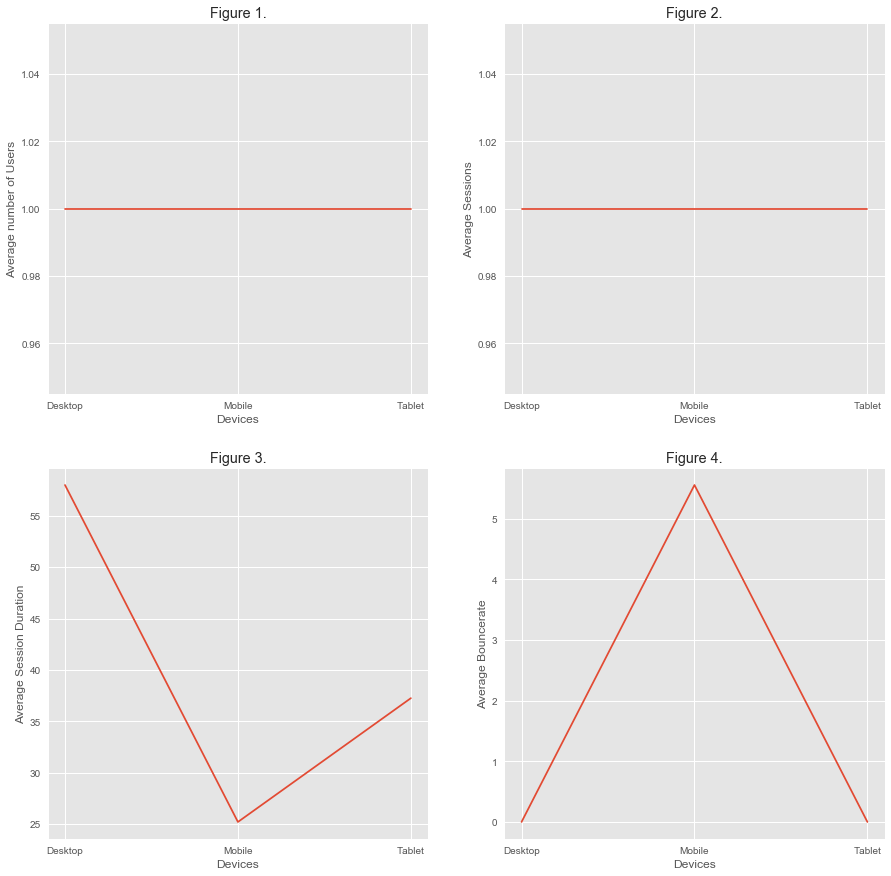

In [125]:
results = data.groupby('deviceCategory').median()

devices = ['Desktop','Mobile','Tablet']
plt.style.use('ggplot')

fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize=(15,15))

ax1.plot(devices, results.users)
ax1.set_title('Figure 1.')
ax1.set_xlabel('Devices')
ax1.set_ylabel('Average number of Users')

ax2.plot(devices, results.sessions)
ax2.set_title('Figure 2.')
ax2.set_xlabel('Devices')
ax2.set_ylabel('Average Sessions')

ax3.plot(devices, results.avgSessionDuration)
ax3.set_title('Figure 3.')
ax3.set_xlabel('Devices')
ax3.set_ylabel('Average Session Duration')

ax4.plot(devices, results.bounceRate)
ax4.set_title('Figure 4.')
ax4.set_xlabel('Devices')
ax4.set_ylabel('Average Bouncerate')

plt.show()

In [112]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In the four plots above you can see that Figure 1 and 2 share a simillar trend, i.e. they vary in the simillarly whereas in Figures 3 and 4 we can see an opposite trend. In the latter 2 figures we can observe that desktop users tend to stay back more than tablet and mobile users. The probable reason for this trend is because the viewing experience of webpages is better optimised for devices that have larger screens and especially for reading content.

Another trend can be observed in the last two figures. In the devices where the session duration is high, the bouncerate is low and vice versa for the other devices. As per intuition, I am less likely to leave, or bounce off of the webpage, if the content present in front of me is appealing enough.

This kind of pattern needs a bit more exploration.

*Note. - The median measure was used (instead of mean) as the values of the dataset is heavily skewed, and the median gives a better idea of the central tendency than the mean in such cases.*

## <a id='1.1'>1.1. What is the nature of the relationship shared by them? Are there other relationships too? </a>

In [337]:
users_sess = np.corrcoef(data.users, data.sessions)
sess_duration = np.corrcoef(data.sessions, data.avgSessionDuration)
users_duration = np.corrcoef(data.users, data.avgSessionDuration)
users_bounce = np.corrcoef(data.users, data.bounceRate)
bounce_duration = np.corrcoef(data.bounceRate, data.avgSessionDuration)
sess_bounce = np.corrcoef(data.sessions, data.bounceRate)

print(f"User vs sessions : {users_sess[0][1]}") 
print(f"Sessions vs session duration: {sess_duration[0][1]}")
print(f"Users vs session duration: {users_duration[0][1]}")
print(f"Users vs bounce rate: {users_bounce[0][1]}")
print(f"Bounce rate vs session duration: {bounce_duration[0][1]}")
print(f"Sessions vs bounce rate: {sess_bounce[0][1]}")

User vs sessions : 0.9699400837651766
Sessions vs session duration: 0.001477799375417441
Users vs session duration: -0.01078493404856531
Users vs bounce rate: -0.0036340885103416177
Bounce rate vs session duration: -0.24131722311263898
Sessions vs bounce rate: -0.002102809731818891


In order to answer this question I tried to analyse the correlation between the specified columns above. After applying the correlation measure on every possible couple, the results obtained were pretty intersting. The following relationships were quite obvious :

- User vs sessions :  0.9699400837651766 - They share a strong positive relationship.

- Bounce rate vs session duration: -0.24131722311263898 - They share a negative relationship or in other words they are inversely related to each other.

But that was not all. Among the other relationships users vs session duration and users vs bounce rate had a correlation coefficient which was low but they could still be considered, given the data distribution is heavily skewed. 
Taking the skewness of the data into consideration, log transformation was applied to decrease the skewness of the data and to test whether my assumptions hold true.

In [381]:
#Log Transformation results

df_log = data[['bounceRate','avgSessionDuration']].applymap(lambda x: np.log(x+0.0000001))
print(np.corrcoef(df_log.bounceRate, df_log.avgSessionDuration))

df_log1 = data[['users','bounceRate']].applymap(lambda x: np.log(x+0.000000000000001))
print(np.corrcoef(df_log1.users, df_log1.bounceRate))

df_log2 = data[['users','avgSessionDuration']].applymap(lambda x: np.log(x+0.0001))
print(np.corrcoef(df_log2.users, df_log2.avgSessionDuration))

df_log3 = data[['sessions','bounceRate']].applymap(lambda x: np.log(x+0.0000000000000000000000001))
print(np.corrcoef(df_log3.bounceRate, df_log3.sessions))

df_log4 = data[['sessions','avgSessionDuration']].applymap(lambda x: np.log(x+0.1))
print(np.corrcoef(df_log4.sessions, df_log4.avgSessionDuration))

[[ 1.         -0.50597645]
 [-0.50597645  1.        ]]
[[1.         0.35834913]
 [0.35834913 1.        ]]
[[1.         0.27364533]
 [0.27364533 1.        ]]
[[1.         0.40048385]
 [0.40048385 1.        ]]
[[1.        0.3158185]
 [0.3158185 1.       ]]


The transformed data revealed interesting information about the relationships that number of sessions and bouncerate share. It turns out that these two have quite a significant and positive relationship with each other. Their relationship is simillar to the relationship that number of users and bouncerate, but the relationship of sessions and bouncerate is more significant. 

The relationship between session and bouncerate reflects that we can expect a hike in the bounce off rate if the number of sessions increase. The latter relationship says a simillar story. Most probably the users visited the page, hence the increase in both user count and session count, and bounced off after a short period of time.

Text(0.5, 1.0, 'Relationship between sessions and bouncerate.')

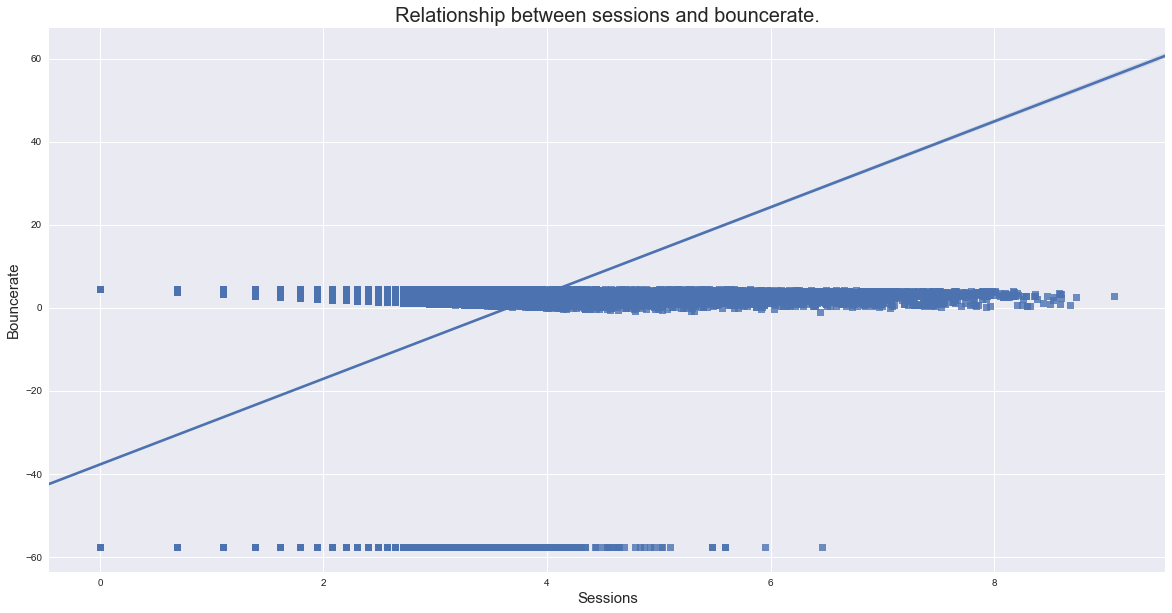

In [382]:
_ = sns.regplot(x="sessions", y="bounceRate", data=df_log3, marker = 's')
_.set_xlabel("Sessions",fontsize=15)
_.set_ylabel("Bouncerate",fontsize=15)
_.set_title("Relationship between sessions and bouncerate.",fontsize=20)

Text(0.5, 1.0, 'Relationship between number of users and bouncerate.')

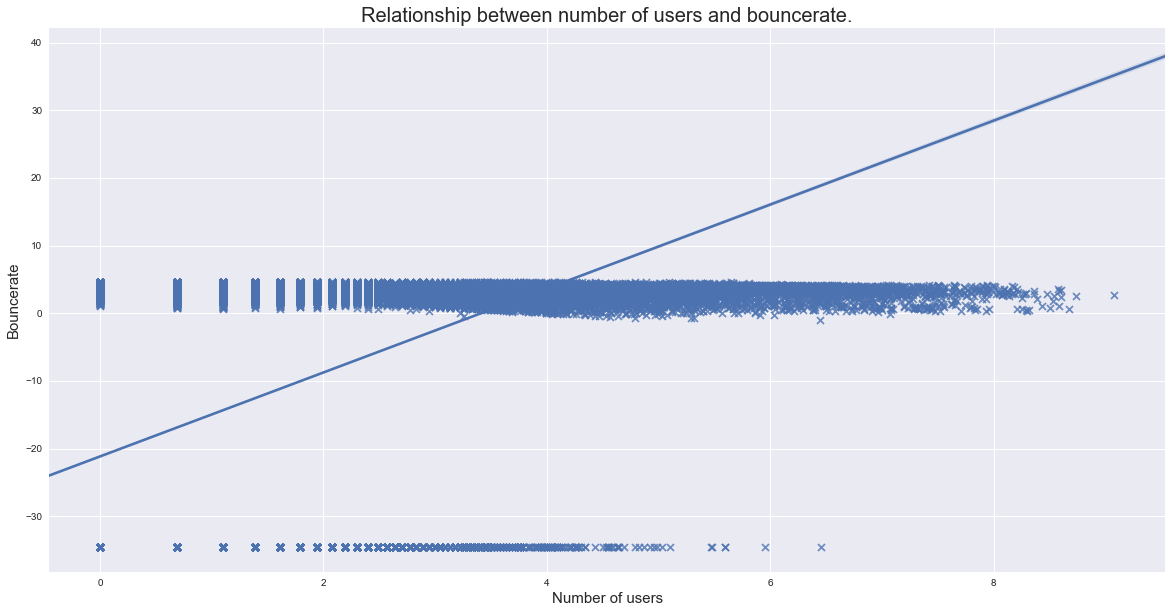

In [338]:
_ = sns.regplot(x="users", y="bounceRate", data=df_log1, marker = 'x')
_.set_xlabel("Number of users",fontsize=15)
_.set_ylabel("Bouncerate",fontsize=15)
_.set_title("Relationship between number of users and bouncerate.", fontsize = 20)

The following figure forms a bridge between the figures above. The nature of the relationship that users and their corresponding sessions share is a reason behind the nature of their corresponding relationships between the bouncerate.

Text(0.5, 1.0, 'Relationship between number of users and sessions.')

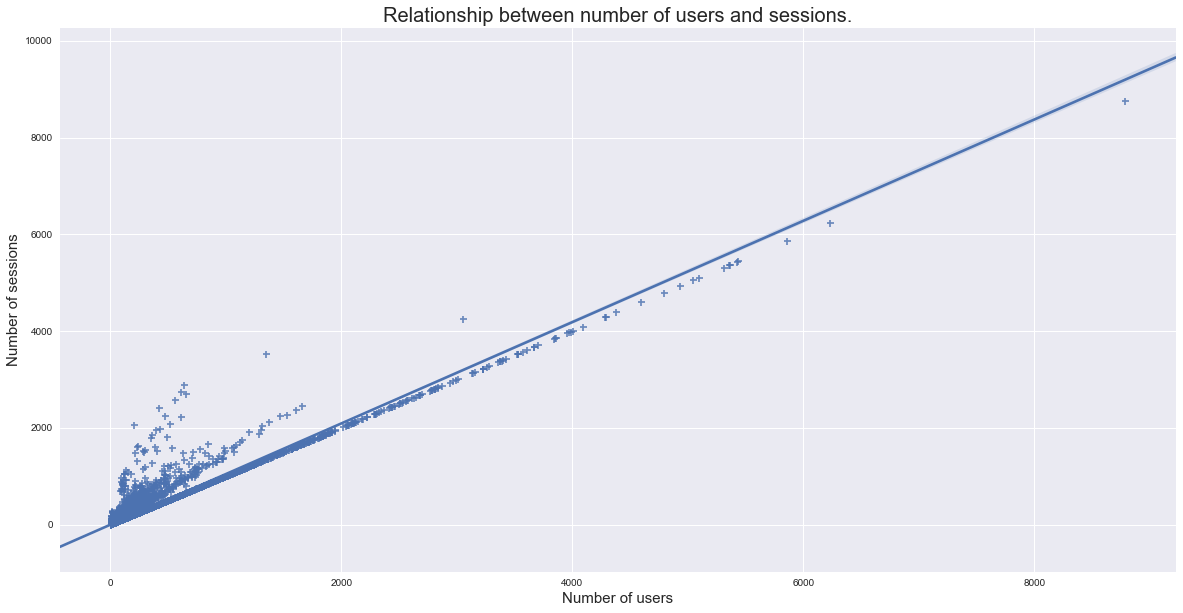

In [383]:
_ = sns.regplot(x="users", y="sessions", data=data, marker = '+')
_.set_xlabel("Number of users",fontsize=15)
_.set_ylabel("Number of sessions",fontsize=15)
_.set_title("Relationship between number of users and sessions.", fontsize = 20)

The assumption that sessions, as seen above, were short-lived becomes more prominent from the suspicion about the negative relationship between session duration and bouncerate. When the session duration is high, users tend not to bounce off, instead they are busy consuming the content present on the webpage.

Text(0.5, 1.0, 'Relationship between session duration and bouncerate.')

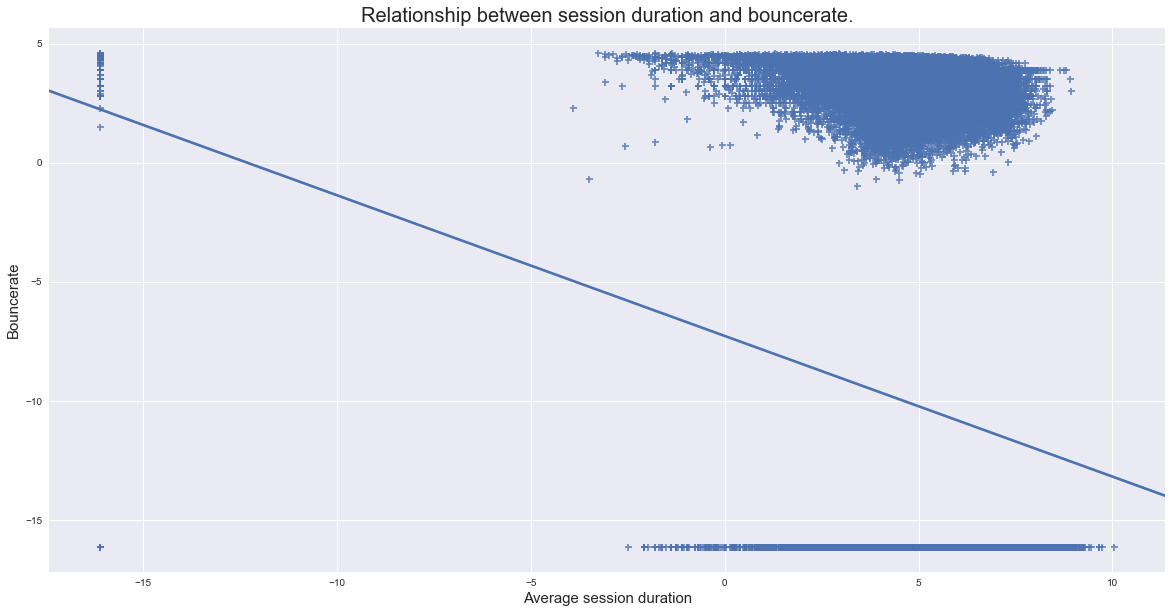

In [329]:
_ = sns.regplot(x="avgSessionDuration", y="bounceRate", data=df_log, marker = '+')
_.set_xlabel("Average session duration",fontsize=15)
_.set_ylabel("Bouncerate",fontsize=15)
_.set_title("Relationship between session duration and bouncerate.",fontsize=20)

Text(0.5, 1.0, 'Relationship between number of users and session duration.')

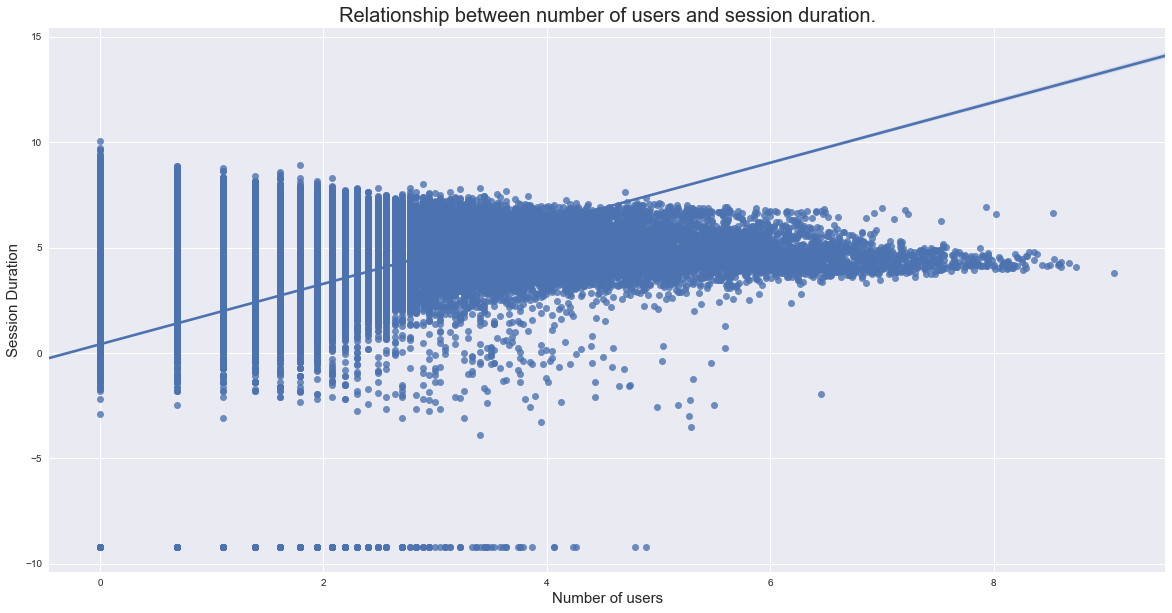

In [335]:
_ = sns.regplot(x="users", y="avgSessionDuration", data=df_log2, marker = 'o')
_.set_xlabel("Number of users",fontsize=15)
_.set_ylabel("Session Duration",fontsize=15)
_.set_title("Relationship between number of users and session duration.", fontsize = 20)

The relationship above shows that longer session durations have been observed with time. Most probably the platform has been well received by the audience and hence the number of visitors have increased since the recording values for this dataset began.

## <a id='2'>2. Does channel grouping share any relationship with the Google analytics metrics? If so what is their nature?</a>

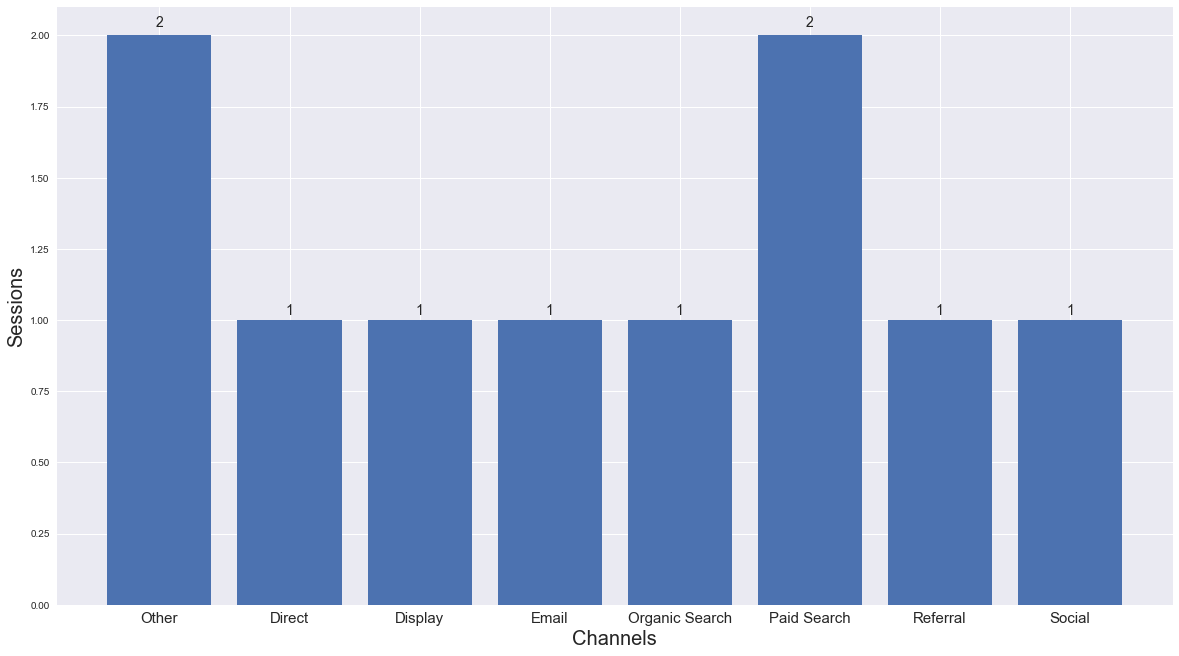

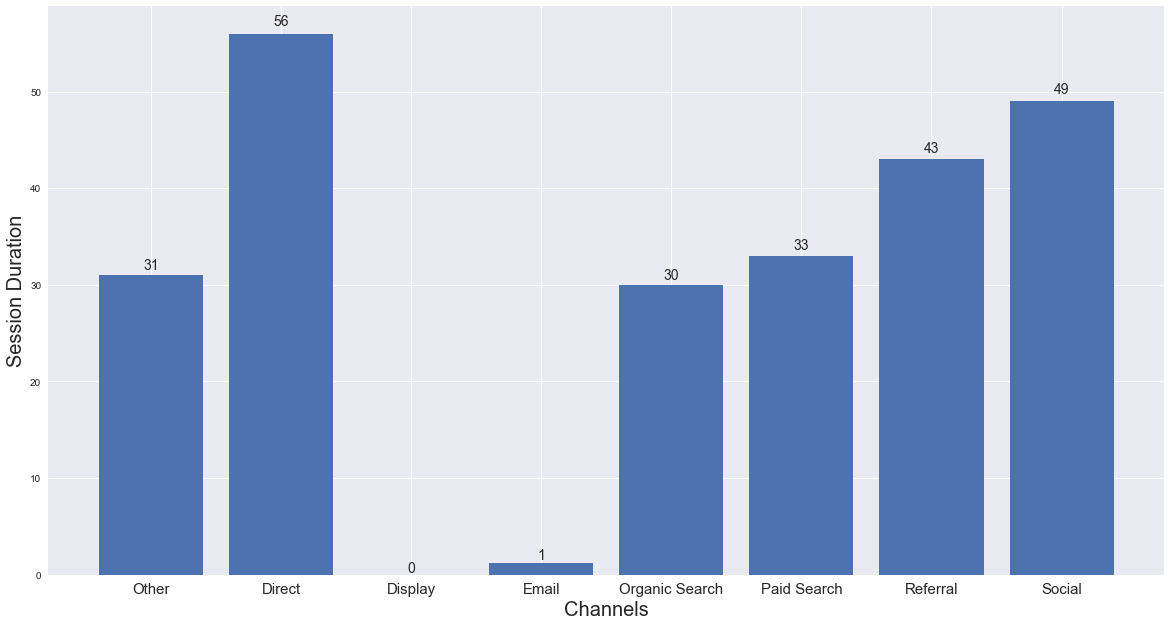

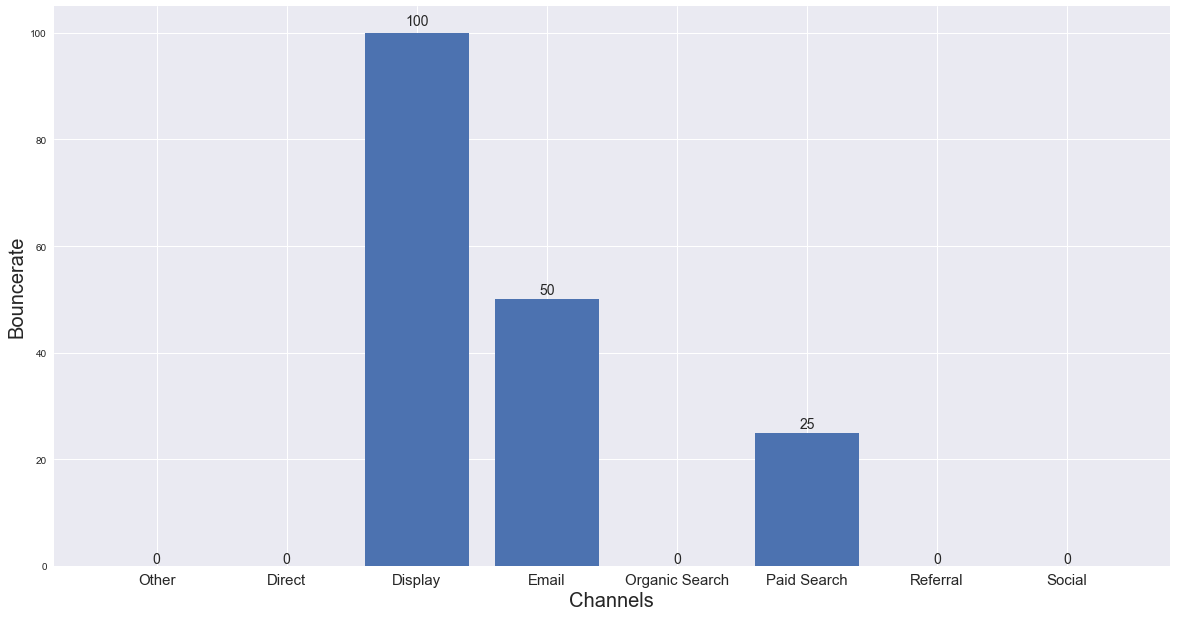

In [385]:
channel_groups = without_notset.groupby('channelGrouping').median()
channels = ['Other','Direct','Display','Email','Organic Search','Paid Search','Referral','Social']

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.01*height, '%d' % int(height),
                ha='center', va='bottom',fontsize=14)

fig = plt.figure(figsize=(20,11))
ax1 = fig.add_subplot(111)

ticks1 = ax1.bar(channels,channel_groups.sessions)
ax1.set_xticklabels(channels, fontsize= 15)
ax1.set_xlabel("Channels", fontsize=20)
ax1.set_ylabel("Sessions", fontsize=20)

autolabel(ticks1)

fig = plt.figure(figsize=(20,23))
ax2 = fig.add_subplot(212)

ticks2 = ax2.bar(channels,channel_groups.avgSessionDuration)
ax2.set_xticklabels(channels, fontsize= 15)
ax2.set_xlabel("Channels", fontsize=20)
ax2.set_ylabel("Session Duration", fontsize=20)

autolabel(ticks2)

fig = plt.figure(figsize=(20,35))
ax3 = fig.add_subplot(313)

ticks3 = ax3.bar(channels,channel_groups.bounceRate)
ax3.set_xticklabels(channels, fontsize= 15)
ax3.set_xlabel("Channels", fontsize=20)
ax3.set_ylabel("Bouncerate", fontsize=20)

autolabel(ticks3)

plt.show()

Channel grouping classifies or groups the kind of traffic the webpage experiences from different sources. Ranging from users who clicked on an ad-banner or affiliate links and ended up on the website to users who are just curious and found the website from the search results. 

Paid search group seems to have an interesting effect on the analytics metrics. Most sessions are being generated by paid search users or users who are visiting the webpage after going the search results returned by the search engine. They typically share an average session duration, but the tendency to bounce off of the webpage is the least in these users. They are quite interested and most probably enjoy consuming the content available. 

Users from direct and social channels are the ones who are most invested into the content available on the webpage. Direct and social channel users tend to have the highest session durations respectively. They tend not to bounce off of the page at all, which probably indicates 2 things :
- they enjoy the content available and 
- the content available is something they rely on.

Display, users coming in from this traffic seam to be least interested about the content available on the webpage. They are the people who clicked on the link available on a web page as an ad and jumped to the webpage being monitored by the analytics engine and almost immediately left. The nature of these users cannot be determined, but by their magnitude of disinterest it may be infered, from intuition, they were interested to check out the product but expected something else.

The statistics provided by these channels begs a question, from where do these users belong?

## <a id='2.1'>2.1. Determine the countries where most users from the above specified channel traffics belong. </a>

In [427]:
g = pd.crosstab(without_notset.channelGrouping,without_notset.Country,normalize = 'index',margins = True).T.reset_index()
g[g['Paid Search']==g['Paid Search'].max()]

channelGrouping,Country,(Other),Direct,Display,Email,Organic Search,Paid Search,Referral,Social,All
60,India,0.740945,0.213859,0.825279,0.263158,0.222594,0.422741,0.117456,0.262066,0.242196


Users who visited the webpage under paid search group belong to India.

In [425]:
g[g['Direct']==g['Direct'].max()]

channelGrouping,Country,(Other),Direct,Display,Email,Organic Search,Paid Search,Referral,Social,All
143,United States,0.062992,0.292365,0.052045,0.526316,0.271366,0.260326,0.491864,0.2502,0.3128


Users who visited the webpage under direct group belong to United States.

In [426]:
g[g['Social']==g['Social'].max()]

channelGrouping,Country,(Other),Direct,Display,Email,Organic Search,Paid Search,Referral,Social,All
60,India,0.740945,0.213859,0.825279,0.263158,0.222594,0.422741,0.117456,0.262066,0.242196


Users who visited the webpage under social group belong to India.

Now that we have looked at the countries where the viewers like the content available on the webpage, lets look at the cities with the maximum traffic for each channel group.

## <a id= '2.2'> 2.2. Find out the cities with the maximum traffic for each channel. </a>

In [60]:
without_notset.groupby('channelGrouping').max().drop(['Country','Region','yearMonth','Year'], axis =1)

,City,deviceCategory,userType,users,sessions,avgSessionDuration,bounceRate,Month
channelGrouping,,,,,,,,
(Other),Yonkers,tablet,Returning Visitor,858,858,3076.0,100.0,12
Direct,Zwolle,tablet,Returning Visitor,3527,3528,23220.0,100.0,12
Display,Yokohama,tablet,Returning Visitor,59,59,2919.0,100.0,10
Email,Thane,tablet,Returning Visitor,9,9,1131.0,100.0,11
Organic Search,la Vall d'Uixo,tablet,Returning Visitor,5858,5861,15477.0,100.0,12
Paid Search,Zwolle,tablet,Returning Visitor,8786,8756,8943.0,100.0,12
Referral,la Vall d'Uixo,tablet,Returning Visitor,385,2070,12159.0,100.0,12
Social,село Речицы,tablet,Returning Visitor,809,809,10352.0,100.0,12


The above cities are the top most locations from where users have visited for every channel group. Zwolle, under paid search, a city in Netherlands is the city with the maximum number users. 

An interesting observation about the occurences above is that almost all the traffic is in the month of December. This means the website experiences high traffic during the winter holidays when the schools are closed and since the webpage is a repository of books for the children such traffic is probably expected.

Time can be a useful metric in cases of such analysis, especially because we can see the user type in the above table to be listed as a 'Returning visitor'. So does the user type have any inclination or relationship with the metrics of the analytics engine? Is there a relationship between time and user type?

## <a id='3'>3. Does 'user type' share any relationship with the numerical metrics of the analytics engine?</a>

There are two types of users:
- new user
- returning user

It is desirable that the number for both types will increase as time progresses. Let us put this assumption to test.

*Note - Although the data is skewed, the following analyses and approximation is based on the mean instead of the median as using it would result in losing values. As median is the positional centre of a distribution it may not give an exact summary of the centre or the central tendency where the mean, although not accurate, still gives a rough approximation of the centre for skewed distribution. Furthermore, the data is being split based on year which may justify the use of mean as with progression of time, data may become skewed with the occurrence of values that qualify as outliers. Hence grouping the data by year may affect the maximum, minimum and centre.*

In [129]:
pd.crosstab(without_notset.deviceCategory,without_notset.userType,normalize = 'index',margins = True)

userType,New Visitor,Returning Visitor
deviceCategory,,
desktop,0.714626,0.285374
mobile,0.696970,0.303030
tablet,0.682097,0.317903
All,0.704531,0.295469


Most new visitors (71% approximately) access the website via desktop while (31% approximately) access the website via tablet.

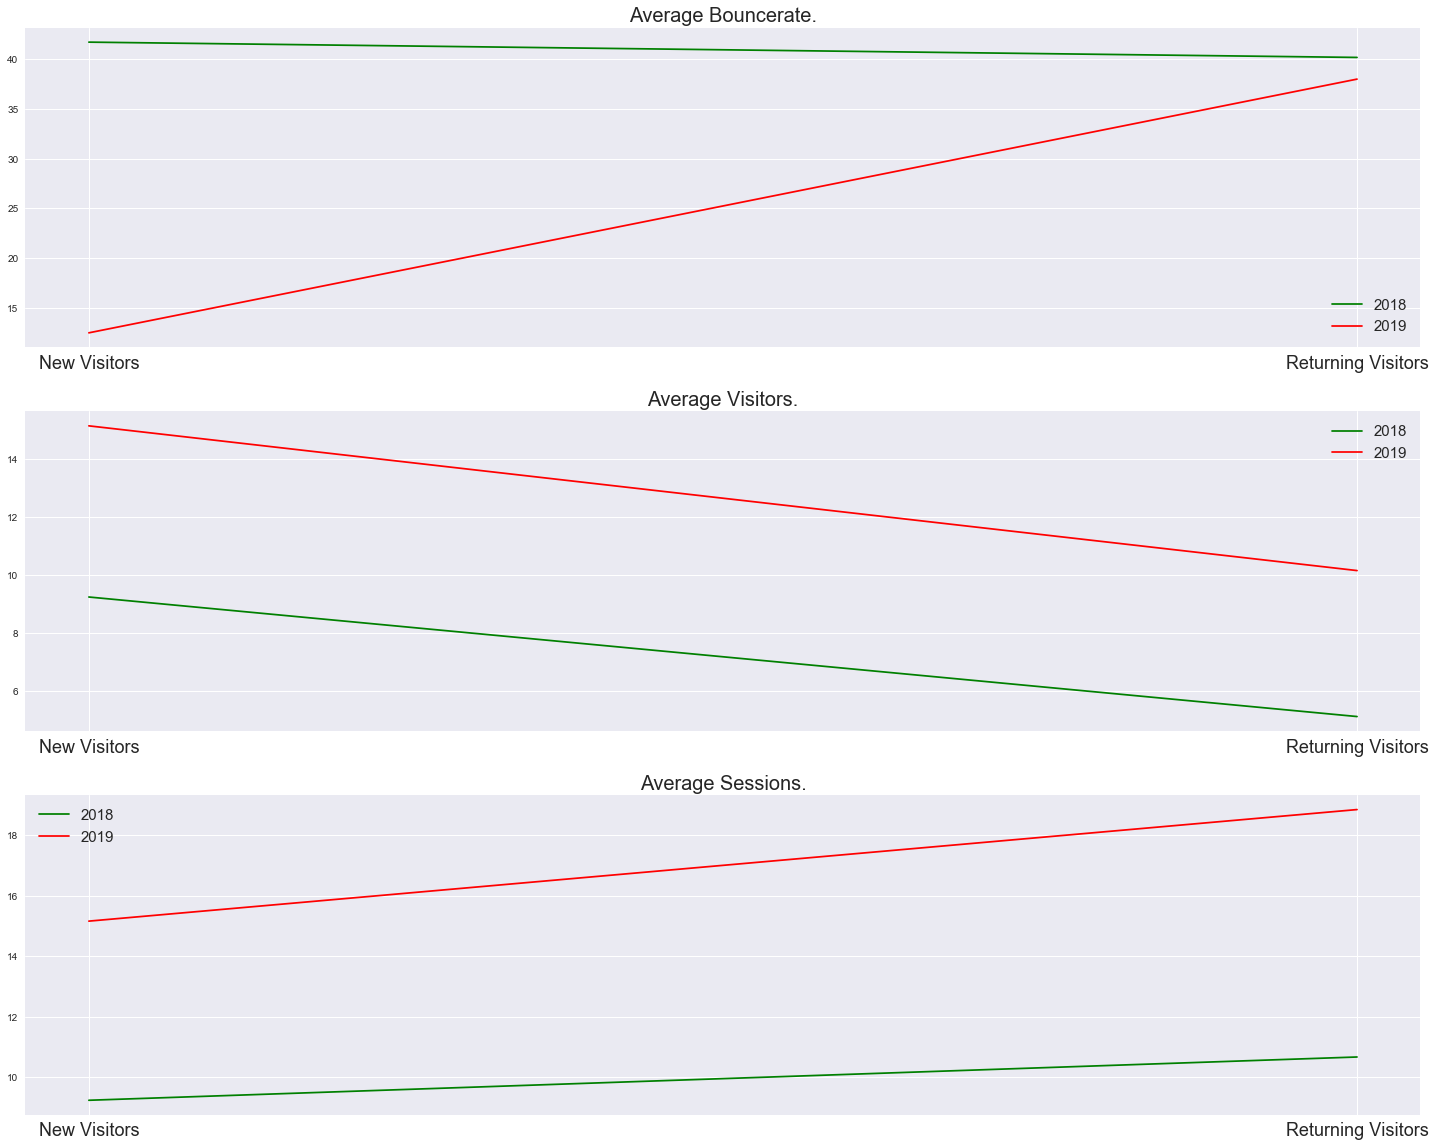

In [433]:
usertype_grouping = without_notset.groupby(['userType',without_notset['yearMonth'].astype('str').apply(lambda x:x[:4])]).mean()

group1 = usertype_grouping
group1 = group1[group1.Year != 2019]
group2 = usertype_grouping
group2 = group2[group2.Year != 2018]

user_type = ("New Visitors", "Returning Visitors")

fig , (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, figsize=(25,20))

ax1.set_title("Average Bouncerate.", fontsize=20)
ax1.plot(user_type,group1.bounceRate,color='green', label='2018')
ax1.plot(user_type,group2.bounceRate, color = 'red',label='2019')
ax1.set_xticklabels(user_type,fontsize= 18)
ax1.legend(fontsize='15')

ax2.set_title("Average Visitors.", fontsize=20)
ax2.plot(user_type,group1.users,color='green',label='2018')
ax2.plot(user_type,group2.users,color='red',label='2019')
ax2.set_xticklabels(user_type,fontsize= 18)
ax2.legend(fontsize='15')

ax3.set_title("Average Sessions.", fontsize=20)
ax3.plot(user_type,group1.sessions,color='green',label='2018')
ax3.plot(user_type,group2.sessions,color='red',label='2019')
ax3.set_xticklabels(user_type,fontsize= 18)
ax3.legend(fontsize='15')

plt.show()

The above figures show similarity to the assumption. 

In the figure Average Bouncerate, we can see how bouncerate has decreased from 2018. In 2018 more than 40 new users have bounced off of the webpage while in 2019 less than 15 new users have bounced off of the webpage. The most probable reason for this behavior maybe due to the imporvement of the webpage UI. The webpage may have become more visually appealing or new features may have been introduced which convinced the new users to stick around. There was also a decrease in the bounce rate of the returning users. 

Average visitors and average sessions figures demonstrate an increase in the average number of visitors and their sessions. At average the number of visitors in 2018 used to be 9 whereas in 2019 it went up to 15. The improvements done within the website has resulted in an increased traffic of returning users who are staying back for longer sessions. There has been, roughly, a 5% increase in the viewership in the number of returning users. 

Hence number of users under each user type has significantly increased and hence the relationship of user type with time is positive.

## <a id='4'>4. See if there are any patterns in usage based on the device type in the top and bottom 10 countries.</a>

The motivation for this statement was to find out if the device type has any relationship with the number of sessions and the session duration. Does the country of origin have any relationship with type of device used or the length of session duration or popularity of the product.

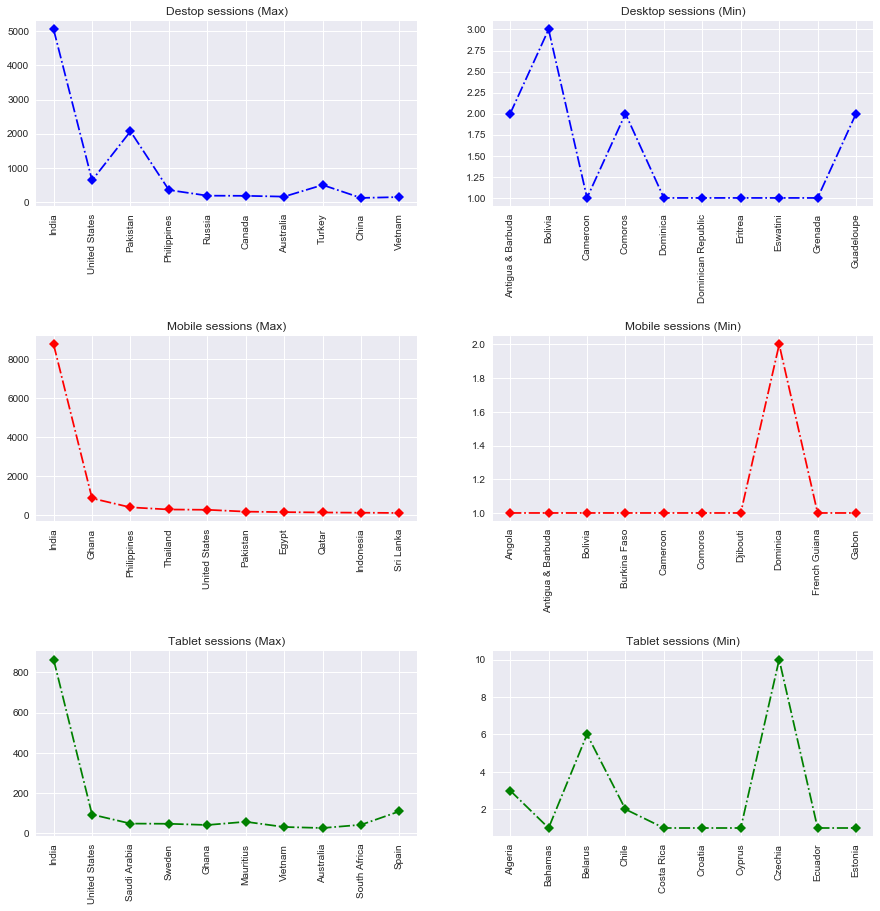

In [266]:
device_country = without_notset.groupby(['deviceCategory','Country']).max().reset_index()

desktop_high = device_country[device_country.deviceCategory == 'desktop'].nlargest(10, ['users'])
mobile_high = device_country[device_country.deviceCategory == 'mobile'].nlargest(10, ['users'])
tablet_high = device_country[device_country.deviceCategory == 'tablet'].nlargest(10, ['users'])

d_h_countries = list(desktop_high.Country)
m_h_countries = list(mobile_high.Country)
t_h_countries = list(tablet_high.Country)


desktop_low = device_country[device_country.deviceCategory == 'desktop'].nsmallest(10,['users'])
mobile_low = device_country[device_country.deviceCategory == 'mobile'].nsmallest(10,['users'])
tablet_low = device_country[device_country.deviceCategory == 'tablet'].nsmallest(10,['users'])

d_l_countries = list(desktop_low.Country)
m_l_countries = list(mobile_low.Country)
t_l_countries = list(tablet_low.Country)

fig , ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize=(15,15))
fig.subplots_adjust(wspace = 0.2, hspace = 0.7)

ax1.plot(d_h_countries,desktop_high.sessions,'-.bD')
ax1.set_xticklabels(d_h_countries, rotation = 'vertical')
ax1.set_title("Destop sessions (Max)", fontsize=12)

ax3.plot(m_h_countries, mobile_high.sessions,'-.rD')
ax3.set_xticklabels(m_h_countries, rotation = 'vertical')
ax3.set_title("Mobile sessions (Max)", fontsize=12)

ax5.plot(t_h_countries, tablet_high.sessions,'-.gD')
ax5.set_xticklabels(t_h_countries, rotation = 'vertical')
ax5.set_title("Tablet sessions (Max)", fontsize=12)

ax2.plot(d_l_countries,desktop_low.sessions,'-.bD')
ax2.set_xticklabels(d_l_countries, rotation ='vertical')
ax2.set_title("Desktop sessions (Min)", fontsize=12)

ax4.plot(m_l_countries,mobile_low.sessions,'-.rD')
ax4.set_xticklabels(m_l_countries, rotation ='vertical')
ax4.set_title("Mobile sessions (Min)", fontsize=12)

ax6.plot(t_l_countries,tablet_low.sessions,'-.gD')
ax6.set_xticklabels(t_l_countries, rotation ='vertical')
ax6.set_title("Tablet sessions (Min)", fontsize=12)

plt.show()

The product is quite popular in India, the Indian subcontinent, USA and some countries in Europe. Since mobiles happen to be more accessible, it seems to be the most preffered mode of access to the website.

Quite a few tablet users in the countries of Belarus and Czechia have visited the webpage. Potential audience maybe present in places like these who may be interested in the product.

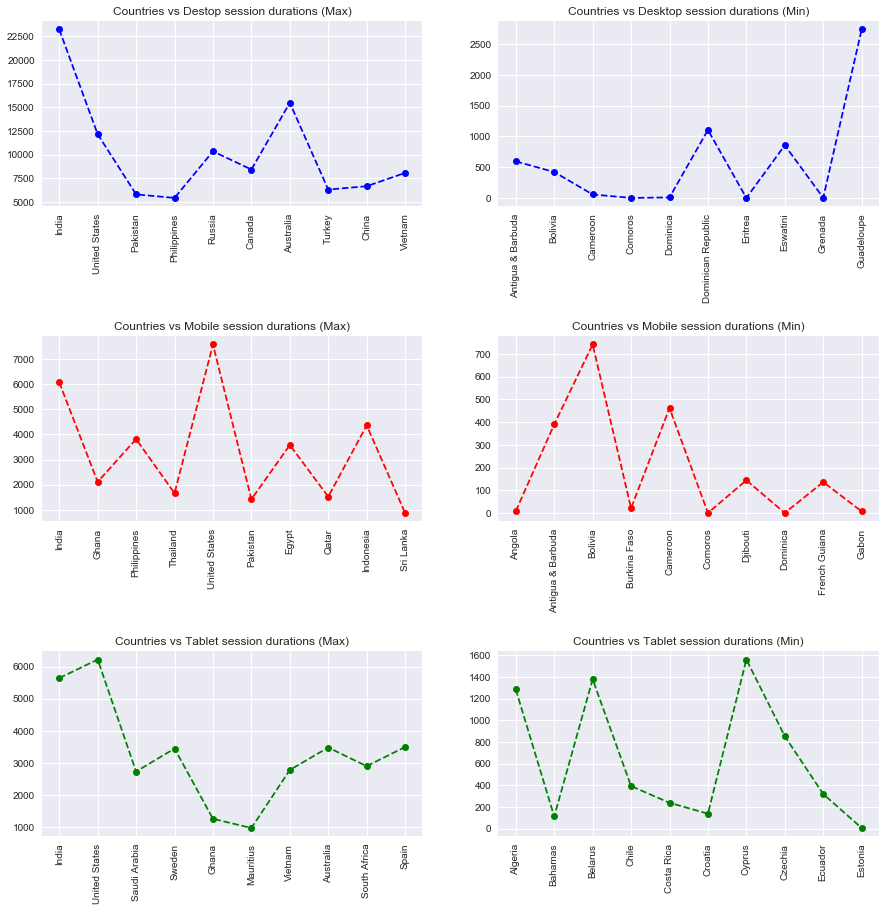

In [156]:
#continuing from the last column
fig , ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize=(15,15))
fig.subplots_adjust(wspace = 0.2, hspace = 0.7)

ax1.plot(d_h_countries,desktop_high.avgSessionDuration,'--bo')
ax1.set_xticklabels(d_h_countries, rotation = 'vertical')
ax1.set_title("Countries vs Destop session durations (Max)", fontsize=12)

ax3.plot(m_h_countries, mobile_high.avgSessionDuration,'--ro')
ax3.set_xticklabels(m_h_countries, rotation = 'vertical')
ax3.set_title("Countries vs Mobile session durations (Max)", fontsize=12)

ax5.plot(t_h_countries, tablet_high.avgSessionDuration,'--go')
ax5.set_xticklabels(t_h_countries, rotation = 'vertical')
ax5.set_title("Countries vs Tablet session durations (Max)", fontsize=12)

ax2.plot(d_l_countries,desktop_low.avgSessionDuration,'--bo')
ax2.set_xticklabels(d_l_countries, rotation ='vertical')
ax2.set_title("Countries vs Desktop session durations (Min)", fontsize=12)

ax4.plot(m_l_countries,mobile_low.avgSessionDuration,'--ro')
ax4.set_xticklabels(m_l_countries, rotation ='vertical')
ax4.set_title("Countries vs Mobile session durations (Min)", fontsize=12)

ax6.plot(t_l_countries,tablet_low.avgSessionDuration,'--go')
ax6.set_xticklabels(t_l_countries, rotation ='vertical')
ax6.set_title("Countries vs Tablet session durations (Min)", fontsize=12)

plt.show()

When we look at the maximum and minimum session durations in the top 10 countries we may see that although people access the webpage more via desktop, some visitors prefer tablets and mobiles too e.g. United States, Sweden and Australia. 

Visitors from nations like Cyprus, Czechia, Bolivia and Guadeloupe enjoy the available content quite a lot. Measures maybe be taken to distribute the product better in these locations.

## <a id='5'>5. Find out the top 10 countries and the number of devices, per device type, used in those countries, per year.</a>

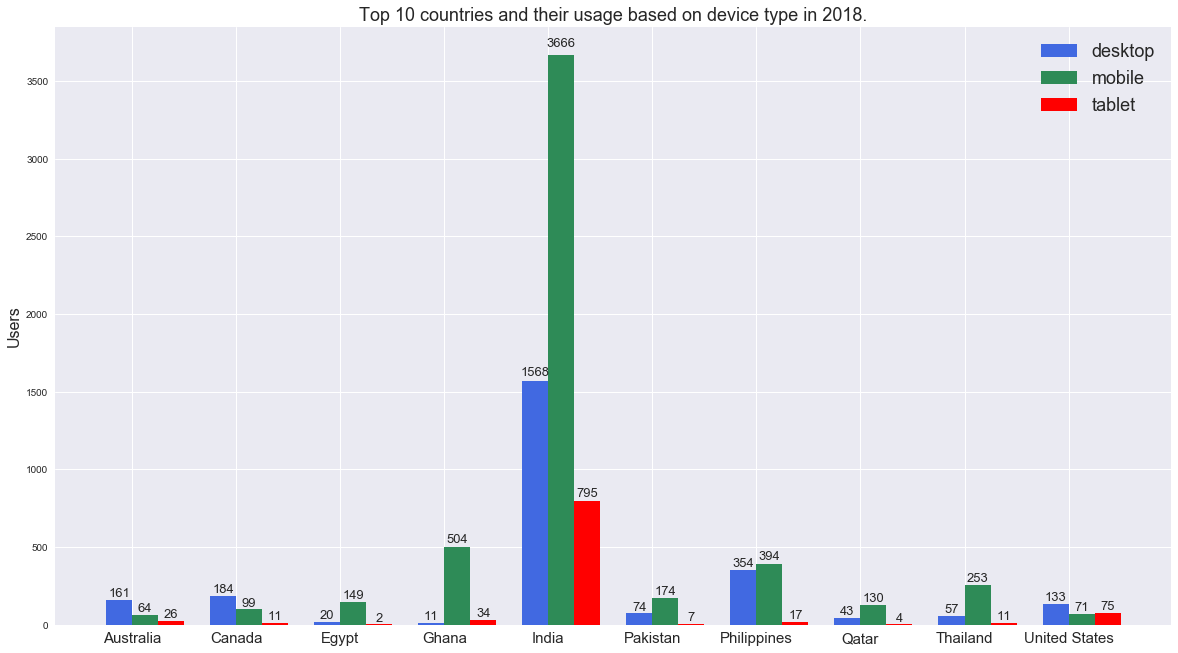

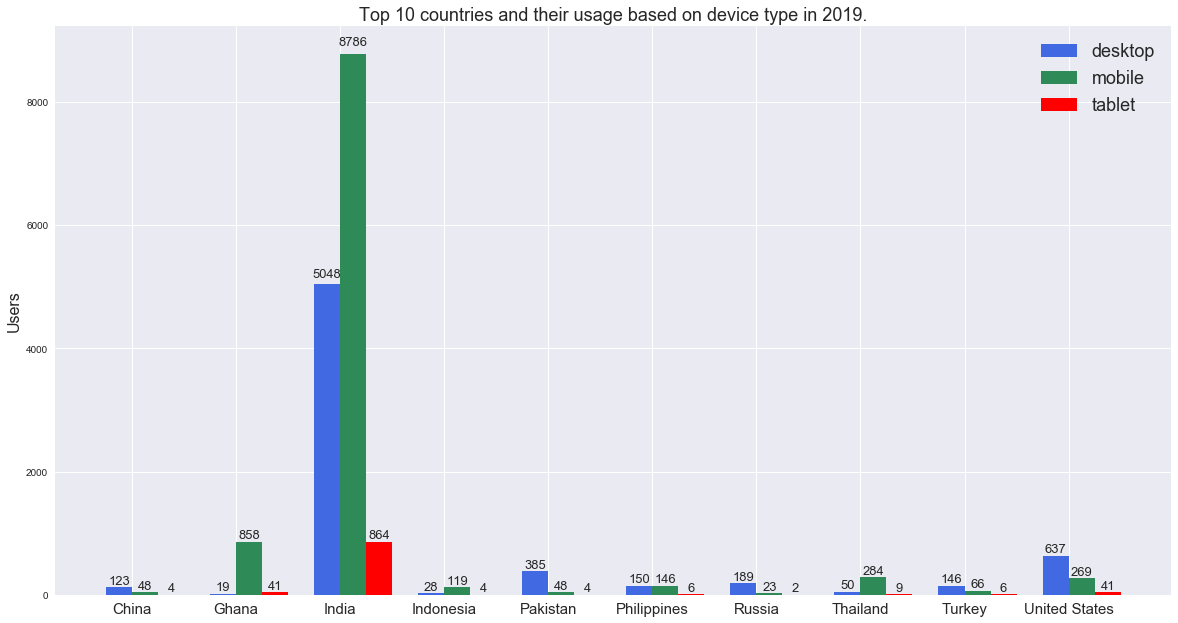

In [97]:
country_device = without_notset.groupby(['Year','Country','deviceCategory']).max().reset_index()
country_device = country_device.sort_values('users', ascending = False)

df_list18 = []
df_list19 = []
country_device18 = country_device[country_device.Year == 2018]
country_device19 = country_device[country_device.Year == 2019]
for i in  country_device18.Country.unique()[:10]:
     df_list18.append(country_device18[country_device18.Country ==i])
for j in country_device19.Country.unique()[:10]:
     df_list19.append(country_device19[country_device19.Country ==j])
new_df18 = pd.concat(df_list18)
new_df19 = pd.concat(df_list19)
n18_1 = new_df18.drop(['yearMonth','Region','City','channelGrouping','bounceRate','userType','sessions'],axis=1)
n18 = n18_1.pivot(index='Country',columns='deviceCategory', values='users').reset_index()
n19_1 = new_df19.drop(['yearMonth','Region','City','channelGrouping','bounceRate','userType','sessions'],axis=1)
n19 = n19_1.pivot(index='Country',columns='deviceCategory', values='users').reset_index()

Countries_18 = n18.Country.unique().tolist()
Countries_19 = n19.Country.unique().tolist()

fig = plt.figure(figsize=(20,11))
ax = fig.add_subplot(111)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.01*height, '%d' % int(height), ha='center', va='bottom',fontsize=13)

N = 10
ind = np.arange(N)
width = 0.25

rects1 = ax.bar(ind, height = n18.desktop, width = 0.25, color='royalblue')
rects2 = ax.bar(ind+0.25, height = n18.mobile, width = 0.25,color='seagreen')
rects3 = ax.bar(ind+0.50, width = 0.25, height = n18.tablet, color = 'red')

ax.set_xticks(ind + width/2 )
ax.set_xticklabels( Countries_18,fontsize=15)
ax.set_ylabel('Users',fontsize=16)
ax.set_title("Top 10 countries and their usage based on device type in 2018.", fontsize=18)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig = plt.figure(figsize=(20,23))
ax1 = fig.add_subplot(212)

rects11 = ax1.bar(ind, height = n19.desktop, width = 0.25, color='royalblue')
rects22 = ax1.bar(ind+0.25, height = n19.mobile, width = 0.25,color='seagreen')
rects33 = ax1.bar(ind+0.50, width = 0.25, height = n19.tablet, color = 'red')

ax1.set_xticks(ind + width/2 )
ax1.set_xticklabels( Countries_19,fontsize=15)
ax1.set_ylabel('Users',fontsize=16)
ax1.set_title("Top 10 countries and their usage based on device type in 2019.", fontsize=18)

autolabel(rects11)
autolabel(rects22)
autolabel(rects33)

ax.legend( (rects1[0], rects2[0], rects3[0]), ('desktop', 'mobile', 'tablet'), fontsize=18 )
ax1.legend( (rects11[0], rects22[0], rects33[0]), ('desktop', 'mobile', 'tablet'), fontsize=18 )

plt.show()

The figure above shows the maximum number of devices used, per device type, in each country in 2018 whereas the figure below depicts the usage in 2019. India, United States, Ghana still remain in the top 10 (along with a few new ones) but the magnitude of usage has significantly increased. No specific trend was observed yet but it looks like new visitors are getting to know the platform and hence they are flocking in from different location. Tablet is still the least used device in every location.

## <a id='6'>6. Find out the cities where the website was accessed most per month, per year.</a>

In [9]:
month_year_country = without_notset.groupby(['Year','Month','City'])

counts = month_year_country.max().reset_index()

counts_2018 = counts[counts.Year == 2018]
counts_2019 = counts[counts.Year == 2019]

month_counts18 = counts_2018.groupby('Month').max().reset_index()
city_18 = [i for i in month_counts18['City']]

month_counts19 = counts_2019.groupby('Month').max().reset_index()
city_19 = [i for i in month_counts19['City']]

months = [i for i in month_counts19['Month']]

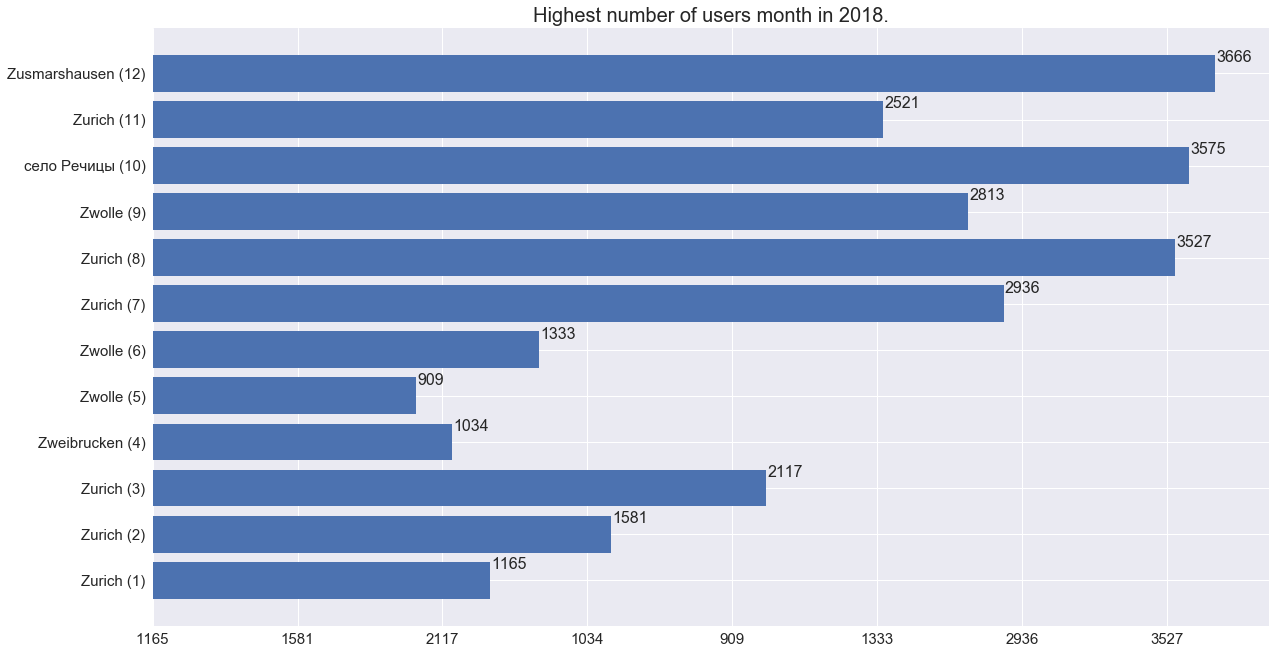

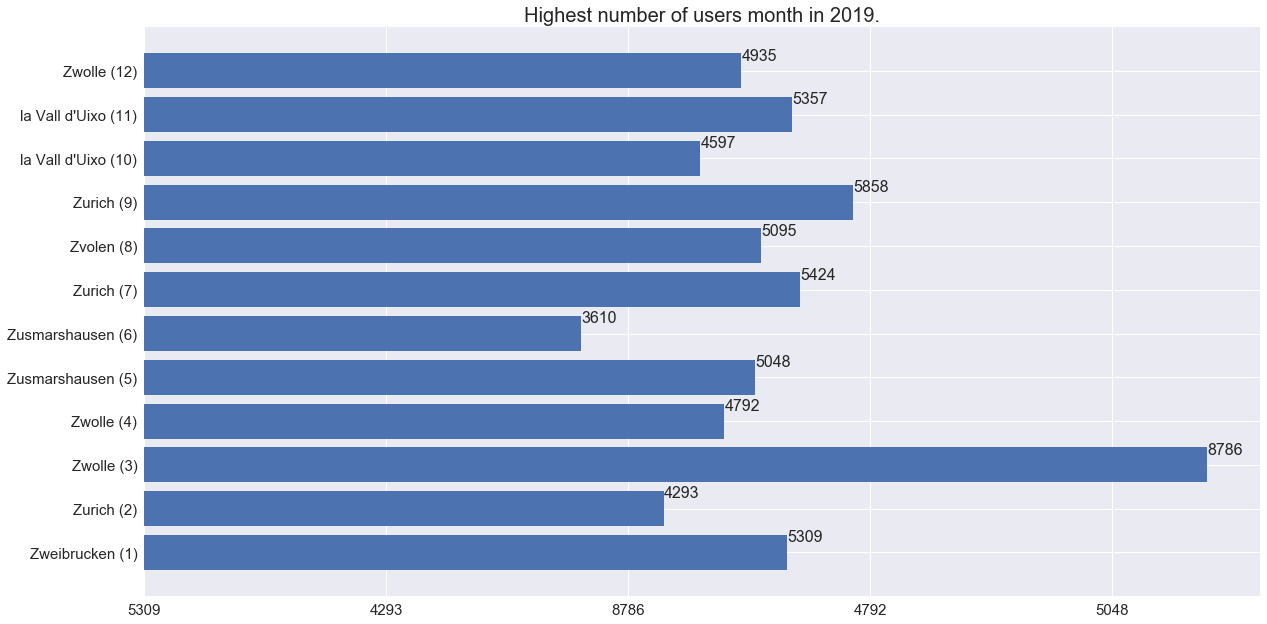

In [98]:
month_city18 = [f'{j} ({str(i)})'for i,j in zip(months,city_18)]
month_city19 = [f'{j} ({str(i)})'for i,j in zip(months,city_19)]
plt.rcParams['figure.figsize'] = (20,10)

fig = plt.figure(figsize=(20,11))
ax = fig.add_subplot(111)


# def autolabel(rects, xpos='center'):
#     """
#     Attach a text label above each bar in *rects*, displaying its height.

#     *xpos* indicates which side to place the text w.r.t. the center of
#     the bar. It can be one of the following {'center', 'right', 'left'}.
#     """

#     xpos = xpos.lower()  # normalize the case of the parameter
#     ha = {'center': 'center', 'right': 'left', 'left': 'right'}
#     offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_y() + rect.get_width()*offset[xpos], 1.01*height,
#                 '{}'.format(height), ha=ha[xpos], va='bottom')

rects = ax.barh(month_city18, month_counts18.users)
ax.set_yticklabels(month_city18, fontsize=15)#,rotation=90)
ax.set_xticklabels(month_counts18.users,fontsize=15)
ax.set_title("Highest number of users month in 2018.", fontsize=20)

for i, v in enumerate(month_counts18.users):
    ax.text(v + 3, i + .25, str(v), fontsize=16)


fig = plt.figure(figsize=(20,23))
ax1 = fig.add_subplot(212)

rects1 = ax1.barh(month_city19, month_counts19.users)
ax1.set_yticklabels(month_city19, fontsize=15)#,rotation=90)
ax1.set_xticklabels(month_counts19.users,fontsize=15)
ax1.set_title("Highest number of users month in 2019.", fontsize=20)

for i, v in enumerate(month_counts19.users):
    ax1.text(v + 3, i + .25, str(v), fontsize=16)


plt.show()

Zusmarshausen, Germany in 2018, December was the city which experienced the maximum number of visitors whereas in 2019, March, Zurich, Switzerland was the city to experience most visitors.

In 2018 the yearly mean of the most visitors was 2265 which went upto 5259 in 2019, which means that there was more than 50% increase in the number of people visitng the webpage in 2019.

## <a id='7'>7. Find out the proportion share of devices used to access the wepage per year.</a>

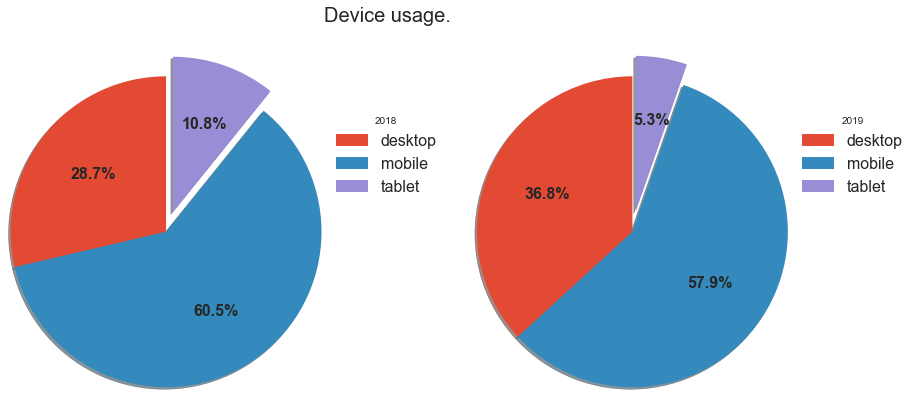

In [124]:
pie_2018 = n18.drop('Country',axis= 1).sum()
pie_2018_values = pie_2018.tolist()
pie_2018_labels = [i for i in pie_2018.to_frame().index]

pie_2019 = n19.drop('Country',axis= 1).sum()
pie_2019_values = pie_2019.tolist()
pie_2019_labels = [i for i in pie_2018.to_frame().index]

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols =2,figsize=(13, 6), subplot_kw=dict(aspect="equal"))
fig.subplots_adjust(hspace = 0.5,wspace = 0.8)

wedges, texts, autotexts1 = ax1.pie(pie_2018_values, radius = 1.5, autopct = '%0.1f%%',shadow = True, explode = [0,0,0.2],
                                    startangle = 90)
ax1.legend(wedges, pie_2018_labels, title="2018",prop={"size":16}, loc = 'upper right', bbox_to_anchor=(1.1, 0, 0.5, 1))

wedges, texts, autotexts2 = ax2.pie(pie_2019_values, radius = 1.5, autopct = '%0.1f%%', 
                                    shadow = True, explode = [0,0,0.2], startangle = 90)

ax2.legend(wedges, pie_2019_labels, title="2019", prop={"size":16},bbox_to_anchor=(1.1, 0, 0.5, 1))

fig.suptitle('Device usage.',  ha ='center', va='bottom',fontsize = 20)
plt.setp([autotexts2,autotexts1], size=16, weight="bold")



plt.show()

Mobile has been the most used mode of access to the webpage, but there has been an increase in the number of desktop users in 2019. This may either be due to the imporved user experience when viwed via a desktop or due to an increase in the content and its variety which makes users prefer desktop more than mobile. Either way there has not been a significant decrease in the mobile usage proportion.

## <a id='7.1'>7.1. Find out the proportion of device usage classified by number of users and the session duration, per year.</a>

In [49]:
country_device_all = without_notset.groupby(['Year','Country','deviceCategory']).sum().reset_index()
country_device_all = country_device_all.sort_values('users', ascending = False)
country_device_all['index'] = [i for i in range(len(country_device_all['users'])) ]

In [50]:
country_device_all18 = country_device_all[country_device_all.Year == 2018]
country_device_all19 = country_device_all[country_device_all.Year == 2019]

country_device_all18 = country_device_all18.drop(['yearMonth','Country','bounceRate','sessions','Month'],axis=1)
country_device_all18_users = country_device_all18.pivot(index = 'index',columns='deviceCategory', values='users').reset_index()
country_device_all18_avgSessionDuration = country_device_all18.pivot(index = 'index',columns='deviceCategory', 
                                                                     values='avgSessionDuration').reset_index()

country_device_all19 = country_device_all19.drop(['yearMonth','Country','bounceRate','sessions','Month'],axis=1)
country_device_all19_users = country_device_all19.pivot(index = 'index',columns='deviceCategory', values='users').reset_index()
country_device_all19_avgSessionDuration = country_device_all19.pivot(index = 'index',columns='deviceCategory', 
                                                                     values='avgSessionDuration').reset_index()

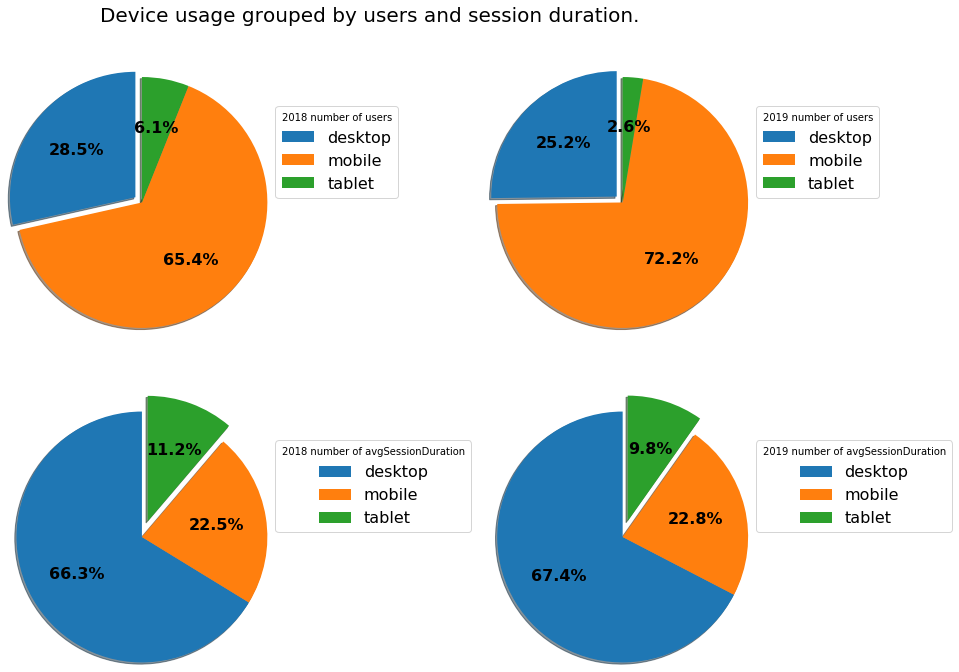

In [55]:
pie_2018_users = country_device_all18_users.drop('index',axis=1).sum()
pie_2018_users_values = pie_2018_users.tolist()
pie_2018_users_labels =  [i for i in pie_2018_users.to_frame().index]

pie_2018_avgSessionDuration = country_device_all18_avgSessionDuration.drop('index',axis=1).sum()
pie_2018_avgSessionDuration_values = pie_2018_avgSessionDuration.tolist()
pie_2018_avgSessionDuration_labels = [i for i in pie_2018_avgSessionDuration.to_frame().index]

pie_2019_users = country_device_all19_users.drop('index',axis=1).sum()
pie_2019_users_values = pie_2019_users.tolist()
pie_2019_users_labels =  [i for i in pie_2019_users.to_frame().index]

pie_2019_avgSessionDuration = country_device_all19_avgSessionDuration.drop('index',axis=1).sum()
pie_2019_avgSessionDuration_values = pie_2019_avgSessionDuration.tolist()
pie_2019_avgSessionDuration_labels = [i for i in pie_2019_avgSessionDuration.to_frame().index]



fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols =2,figsize=(14, 10), subplot_kw=dict(aspect="equal"))
fig.subplots_adjust(wspace = 0.6,hspace = 0.6)


wedges, texts, autotexts1 = ax1.pie(pie_2018_users_values, radius = 1.5, autopct = '%0.1f%%', 
                                    shadow = True, explode = [0.1,0,0], startangle = 90)
ax1.legend(wedges, pie_2018_users_labels, title="2018 number of users", bbox_to_anchor=(1.1, 0, 0.5, 1), prop={"size":16})


wedges, texts, autotexts2 = ax2.pie(pie_2019_users_values, radius = 1.5, autopct = '%0.1f%%', 
                                    shadow = True, explode = [0.1,0,0], startangle = 90)
ax2.legend(wedges, pie_2019_users_labels, title="2019 number of users", bbox_to_anchor=(1.1, 0, 0.5, 1), prop={"size":16})


wedges, texts, autotexts3 = ax3.pie(pie_2018_avgSessionDuration_values, radius = 1.5, autopct = '%0.1f%%', 
                                    shadow = True, explode = [0,0,0.2], startangle = 90)
ax3.legend(wedges, pie_2018_avgSessionDuration_labels, title="2018 number of avgSessionDuration", 
           bbox_to_anchor=(1.1, 0, 0.5, 1), prop={"size":16})


wedges, texts, autotexts4 = ax4.pie(pie_2019_avgSessionDuration_values, radius = 1.5, autopct = '%0.1f%%', 
                                    shadow = True, explode = [0,0,0.2], startangle = 90)
ax4.legend(wedges, pie_2019_avgSessionDuration_labels, title="2019 number of avgSessionDuration", 
           bbox_to_anchor=(1.1, 0, 0.5, 1),prop={"size":16})

fig.suptitle('Device usage grouped by users and session duration.',   va='bottom',fontsize = 20)
plt.setp([autotexts1,autotexts2,autotexts3,autotexts4], size=16, weight="bold")



plt.show()

Although the most common mode of access to visit the website is the mobile, people still prefer the desktop. When the session duration increases people prefer the desktop mainly because of the larger screen area available. 

Mobile users, on the other hand, have significantly increased as they claim almost 75% of all visitors in 2019. A spike in the proportion of mobile users may probably be due to the increase in new visitors.

## <a id='8'>8. Does channel grouping affect the type of visitor? </a>

Channel grouping may have an effect of the kind of viewership. By intituition it is quite natural to expect most new visitors from channels like social and most returning visitors from channels like direct or organic search. Lets find out how the assumptions fare against the results.

In [71]:
print("Proportion of visitors for each channel.")
d = pd.crosstab(without_notset.channelGrouping,without_notset.userType,normalize = 'index', margins = True).T.reset_index()
d.rename(columns={'All':'Summary'})

Proportion of visitors for each channel.


channelGrouping,userType,(Other),Direct,Display,Email,Organic Search,Paid Search,Referral,Social,Summary
0,New Visitor,0.598425,0.656182,0.702602,0.605263,0.707648,0.727005,0.76241,0.659661,0.704531
1,Returning Visitor,0.401575,0.343818,0.297398,0.394737,0.292352,0.272995,0.23759,0.340339,0.295469


It turns out that most new users visit from channels referral and paid search while most returning users visit the webpage from email and direct. 

A considerable amount of new visitors visit the website via organic search which is quite fascinating. This may mean that the popularity of the product has started to increase or maybe the search engine results have been better optimised to suggest the name of the website. 

### Exploring the above dataset was pretty fun. Hope my observations and inferences made sense to you. Thank you for your time!